# AI Agent Design Patterns with AutoGen

Welcome to the comprehensive guide on constructing and customizing multi-agent systems using AutoGen. This guide is designed to help you develop large language model (LLM) applications, enabling agents to take on diverse roles and collaborate seamlessly on complex tasks. Whether you're building simple agents or sophisticated multi-agent systems, this guide will provide you with the foundational knowledge and practical insights needed to harness the full potential of AutoGen.

## 📋 Table of Contents

- **Overview of Agents in AutoGen**
- **Use Case: Multi-Agent System for Medical Writing**
- **Agent Architectural Patterns**
  - **Reflection**
  - **Tool Utilization**
  - **Planning**
  - **Multi-Agent Collaboration**

In [1]:
import os
import pprint

# Define the target directory
target_directory = r"C:\Users\pablosal\Desktop\gbbai-agent-architecture-lab"  # change your directory here

# Check if the directory exists
if os.path.exists(target_directory):
    # Change the current working directory
    os.chdir(target_directory)
    print(f"Directory changed to {os.getcwd()}")
else:
    print(f"Directory {target_directory} does not exist.")

Directory changed to C:\Users\pablosal\Desktop\gbbai-agent-architecture-lab


## Overview of Agents in AutoGen

AutoGen introduces conversable agents designed for task-solving through inter-agent dialogue. Key features include:

- **Conversable**: Agents can initiate and continue conversations with others.
- **Customizable**: Integration of LLMs, humans, tools, or combinations thereof is supported.

AutoGen includes a `ConversableAgent` class for agents that communicate to complete tasks. Agents vary in their actions upon receiving messages. Notably:
- `AssistantAgent` acts as an AI assistant, primarily using LLMs (e.g., GPT-4) to generate Python code for tasks described in messages. It can suggest corrections post-execution. Customization is possible via system messages and LLM configuration (`llm_config`).
- `UserProxyAgent` represents human users, defaulting to soliciting human input but capable of executing code and using tools. It can automatically execute code blocks from messages if no human input is provided, with the option to disable this feature. LLM-based responses can be enabled with `llm_config`.

Agents' auto-reply feature promotes autonomous communication while allowing for human input. Extension is straightforward with the `register_reply()` method.

The setup includes creating an `AssistantAgent` named "assistant" and a `UserProxyAgent` named "user_proxy" to facilitate task-solving.

### Initial Configuration with `config_list`

The `config_list` plays a crucial role in tailoring our setup to accommodate various tasks, each potentially requiring a distinct model. This flexibility is particularly important as we plan to leverage GPT-4 for our operations. The `config_list` is essentially a list of dictionaries, with each dictionary specifying configurations for different endpoints. These configurations are pivotal for ensuring that the correct model and endpoint are utilized for the intended task.

**Key Advantages of Multi-Agent Architectures with GPT-4o:**

- **Enhanced Latency Capabilities:** GPT-4o's superior response times are crucial for environments where agents must interact swiftly, ensuring fluid and efficient communication.
- **Cost Efficiency:** Its cost-effective deployment supports extensive agent interactions, maintaining budgetary control while maximizing operational scale.
- **Optimized Performance:** The model's cutting-edge technology boosts overall system performance, especially in complex, multi-agent environments where precision and reliability are paramount.

By leveraging GPT-4o, we aim to enhance both the performance and cost-efficiency of our operations, making it an ideal choice for systems requiring rapid and economical interactions among agents.

In [2]:
import autogen
import openai

print(f"We are using following autogen library version: {autogen.__version__}")
print(f"We are using following openai library version: {openai.__version__}")

flaml.automl is not available. Please install flaml[automl] to enable AutoML functionalities.


We are using following autogen library version: 0.2.29
We are using following openai library version: 1.59.7


In [3]:
from dotenv import load_dotenv
import autogen
import os

# Load environment variables from a .env file
load_dotenv()

# Azure Open AI Completion Configuration
AZURE_OPENAI_KEY = os.getenv("AZURE_OPENAI_KEY")
AZURE_AOAI_CHAT_MODEL_NAME_DEPLOYMENT_ID = os.getenv("AZURE_AOAI_CHAT_MODEL_NAME_DEPLOYMENT_ID")
AZURE_OPENAI_API_ENDPOINT = os.getenv("AZURE_OPENAI_API_ENDPOINT")
AZURE_OPENAI_API_VERSION = os.getenv("AZURE_OPENAI_API_VERSION")

llm_config = {
    "config_list": [
        {
            "model": AZURE_AOAI_CHAT_MODEL_NAME_DEPLOYMENT_ID,
            "api_type": "azure",
            "api_key": AZURE_OPENAI_KEY,
            "base_url": AZURE_OPENAI_API_ENDPOINT,
            "api_version": AZURE_OPENAI_API_VERSION
        }
    ]
}

## 📝 Use Case: Multi-Agent System for Medical Writing 

In this scenario, we design a multi-agent system specifically tailored to improve the quality of medical writing in the research space. This system consists at the beginning of three specialized agents: the Medical Researcher, the Clinical Evaluator, and the Medical Editor. Each agent brings a unique set of skills and responsibilities, working collaboratively to iteratively refine the documentation.

## 🏗️ Agent Architectural Patterns 

In this section, we will review four key agent architectural patterns commonly used in the industry. Reflection and tool utilization are among the most widely adopted patterns in production systems today.

- **Reflection**
  - Reflection allows an agent to evaluate its own actions and outcomes, facilitating continuous improvement. By analyzing past decisions, the agent can identify errors and refine its strategies.

- **Tool Utilization**
  - This pattern involves agents leveraging external tools or APIs to augment their capabilities. By accessing specialized resources, agents can perform tasks beyond their inherent functions.

- **Planning**
  - Planning involves an agent's ability to devise a structured sequence of actions to achieve a specific goal. This includes breaking down complex tasks into manageable steps and organizing them logically.

- **Mixture of Experts and Composable Collaboration**
  - This approach involves multiple specialized agents, or "experts," working together to accomplish tasks that may be too complex for a single agent or a simple multi-agent architecture.

## Reflection

### Pattern 1: Two-Agent Chat Conversation

Imagine two specialized agents having a conversation to improve a medical manuscript. Here's how it works:

1. **Starting the Chat**: The Medical Researcher agent sends the first message. This message is the initial draft of the manuscript based on the provided research findings. The message includes instructions to ensure the content is scientifically accurate, comprehensive, and informative. It should cover all necessary details of the study, including methodology, results, and conclusions. The draft should be clear and precise, suitable for peer review and publication.

2. **Exchanging Messages**: The Clinical Evaluator agent receives the draft and replies with feedback. The Clinical Evaluator's task is to review the manuscript thoroughly, ensuring it is clinically accurate, relevant, and adheres to ethical guidelines. The evaluator provides detailed and constructive feedback to enhance the scientific rigor and ethical considerations of the document. The Medical Researcher then revises the manuscript based on this feedback, and they continue to exchange messages, refining the document.

3. **Ending the Chat**: After they've exchanged enough messages and the manuscript is thoroughly reviewed and revised, the conversation ends.

4. **Creating a Summary**: Once the chat is over, a summary is created. This summary captures the main points of their discussion and the improvements made to the manuscript.

So, a two-agent chat in this context is like a digital conversation between the Medical Researcher and Clinical Evaluator agents, where they take turns refining a medical manuscript, and we can later review the key points of their collaboration.

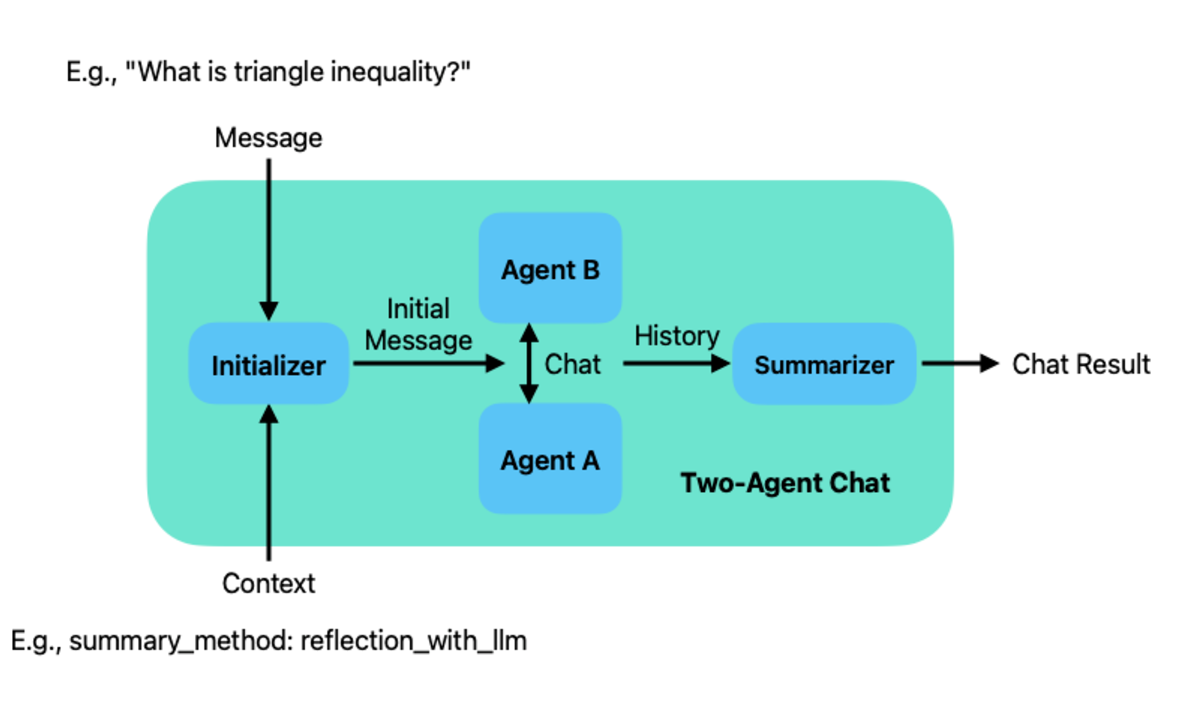

In [4]:
# Initiating a Two-Agent Chat Conversation

# Medical Researcher Agent
medical_researcher = autogen.AssistantAgent(
    name="Medical Researcher",
    system_message=(
        "You are a dedicated medical researcher. Your primary responsibility is to draft an initial manuscript "
        "based on the provided research findings. Ensure that the content is scientifically accurate, comprehensive, "
        "and informative. Cover all necessary details of the study, including methodology, results, and conclusions. "
        "Your draft should be clear and precise, suitable for peer review and publication. Only return the draft."
    ),
    llm_config=llm_config,
)

# Clinical Evaluator Agent
clinical_evaluator = autogen.AssistantAgent(
    name="Clinical Evaluator",
    system_message=(
        "You are a clinical evaluator acticis as critic with expertise in medical ethics and clinical accuracy. Your task is to review "
        "the manuscript thoroughly, ensuring it is clinically accurate, relevant, and adheres to ethical guidelines. "
        "Provide detailed and constructive feedback to enhance the scientific rigor and ethical considerations of the document. "
        "Your review should help improve the manuscript's quality and integrity. Please type FINALIZE when the conditions are met"
    ),
    is_termination_msg=lambda x: x.get("content", "").find("TERMINATE") >= 0,
    llm_config=llm_config,
)

#### Understanding `initiate_chat` Method: Enabling Stateful Interactions in Agents

The `initiate_chat` method is essential for creating stateful, memory-enabled interactions between agents. In agent architecture, “statefulness” refers to an agent's ability to retain and utilize information from prior exchanges to shape its responses in real-time, maintaining continuity and relevance in multi-step tasks or ongoing conversations.

Key Parameters:

- **recipient**: Specifies the target agent for communication, allowing focused interactions that can adapt based on the agent's role or expertise. Each interaction is directed, keeping exchanges precise and task-oriented.

- **message**: Sets the conversation’s initial context, enabling agents to start interactions with specific goals or conditions. This context-awareness is key to maintaining state, especially when the task involves progressive steps or detailed guidance.

- **max_turns**: Controls the number of message exchanges allowed, ensuring that the conversation is goal-oriented and efficient. This keeps the interactions concise, helping to avoid redundant back-and-forth exchanges.

- **summary_method**: Offers ways to condense and recall key points from the conversation, like using the last message or a reflection summary via LLMs. Summaries create an efficient memory footprint, enabling agents to “remember” critical insights without retaining every detail.

- **clear_history**: Resets past interactions when needed, letting the agent start fresh without previous context. This is useful in tasks where each conversation needs independence from prior exchanges.

- **cache and context**: Enable agents to reuse information without recalculating, and to pass additional information that is essential to the conversation. These elements enhance efficiency and continuity, allowing the agent to access relevant data across sessions.

Responses from `initiate_chat` are structured to provide comprehensive insights into the conversation:

- **content**: Contains the concluding message or content derived from the chat.
- **history**: Captures the entire sequence of messages exchanged during the chat.
- **summary**: Offers a condensed overview of the conversation, generated based on the specified `summary_method`.

In [5]:
# Example of using initiate_chat with all parameters for Medical Documentation Enhancement
task = '''
        Create a comprehensive medical research document detailing the study on 
        the effects of a new drug on heart disease. Include methodology, results, 
        discussion, and conclusion sections. Ensure the document adheres to medical 
        research standards and ethical guidelines.
       '''

# Initiate chat between Medical Researcher and Clinical Evaluator
res_clinical_evaluator = clinical_evaluator.initiate_chat(
    recipient=medical_researcher,
    message=task,
    max_turns=3,
    summary_method="last_msg",
    timeout=60,  # Optional: wait up to 60 seconds for a response
    context={"additional_info": "Emphasize the drug's safety profile and side effects."}  # Optional context
)

# Check the response object
# print("Clinical Evaluator Response History:", res_clinical_evaluator.chat_history)
# print("Clinical Evaluator Response Summary:", res_clinical_evaluator.summary)
# print("Clinical Evaluator Response Cost:", res_clinical_evaluator.cost)

Clinical Evaluator (to Medical Researcher):


        Create a comprehensive medical research document detailing the study on 
        the effects of a new drug on heart disease. Include methodology, results, 
        discussion, and conclusion sections. Ensure the document adheres to medical 
        research standards and ethical guidelines.
       

--------------------------------------------------------------------------------
Medical Researcher (to Clinical Evaluator):

# Effects of Cardiozol on Heart Disease: A Comprehensive Study

## Abstract
Cardiozol, a novel pharmacological agent, has shown potential in the treatment of heart disease. This study investigates its efficacy and safety profile in patients with various stages of heart disease. The randomized, double-blind, placebo-controlled trial provides an in-depth analysis of the effects of Cardiozol on cardiac function, symptom alleviation, and overall patient outcomes.

## Introduction
Heart disease remains the leading caus

### Pattern 2: Sequential Chats

The sequential pattern involves a series of conversations where each agent completes a specific task and passes the outcome to the next agent in the workflow. This pattern is effective for complex tasks that can be divided into smaller, interdependent sub-tasks handled by specialized agents. By chaining these interactions, the overall task is completed efficiently, with each agent contributing their expertise.

In the provided code example, the agents collaborate to produce a finalized medical research document:

- **User Proxy**: Acts on behalf of the user to provide the research topic and main focus.
- **Medical Researcher**: Drafts a comprehensive case study based on the topic received.
- **Clinical Evaluator**: Reviews the draft, focusing on methodology and results, and provides detailed feedback.
- **Medical Editor**: Edits and finalizes the research document, incorporating the evaluator's feedback.

**Key Aspects of the Sequential Pattern in This Context**:

- **Specialized Roles**: Each agent has a distinct role that leverages their expertise.
- **Information Flow**: Summaries and feedback are passed sequentially, ensuring each agent has the necessary context.
- **Controlled Interaction**: By managing the conversation history and using summaries, the pattern maintains clarity and focus.
- **Final Output**: The process culminates with a refined document that has undergone research, evaluation, and editing.



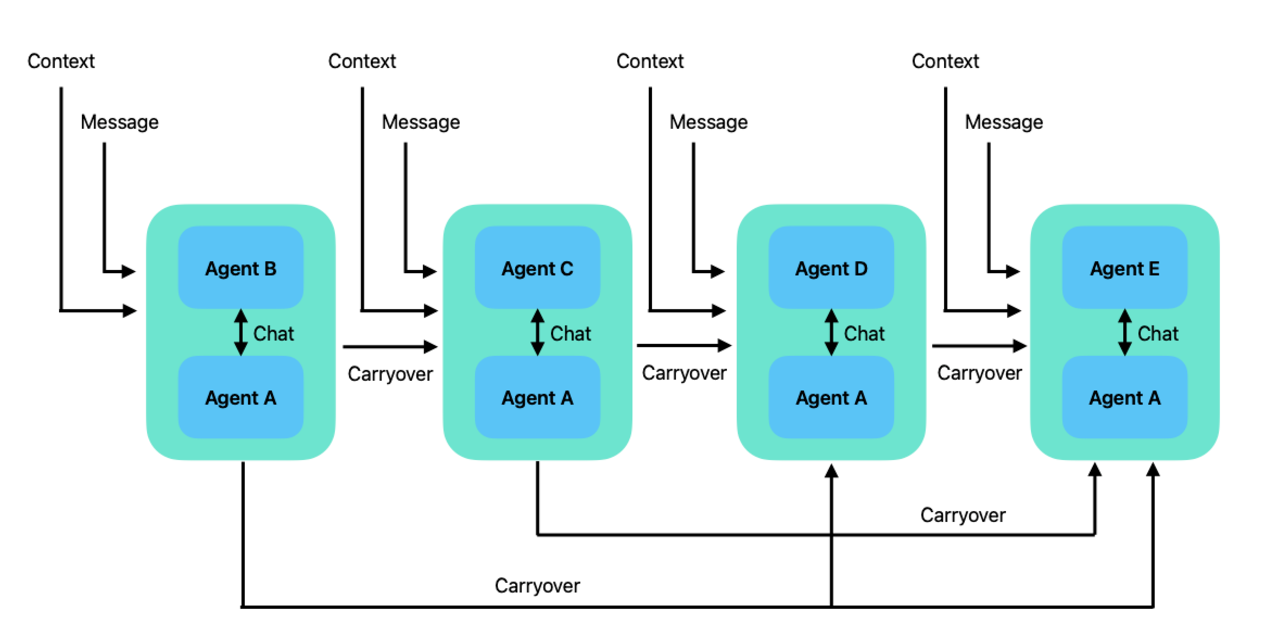

In [6]:
from autogen import ConversableAgent, initiate_chats

user_proxy = ConversableAgent(
    name="User_Proxy",
    system_message="You are acting on behalf of the user. Provide the topic and main focus of the research to initiate the process.",
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="ALWAYS",
)

medical_researcher = ConversableAgent(
    name="Medical_Researcher",
    system_message='''You are a diligent medical researcher. Draft a comprehensive case study beased on the topic and main focus shared by User_Proxy, 
    covering methodology, results, discussion, and conclusions. 
    Your task is to research and draft the document.''',
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

clinical_evaluator = ConversableAgent(
    name="Clinical_Evaluator",
    system_message='''You are a clinical evaluator. Act as a judge. Review the study draft to ensure it meets medical research standards, 
    particularly focusing on methodology and result accuracy. Provide detailed feedback to enhance the document's quality.''',
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

medical_editor = ConversableAgent(
    name="Medical_Editor",
    system_message='''You are a medical editor. Edit the research document for clarity, accuracy,
      and adherence to medical standards based on the feedback from the clinical evaluator.''',
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

chats = [
    {
        "sender": clinical_evaluator,
        "recipient": user_proxy,
        "message": 
            "Hi there! What is the topic of the research and the main focus of the study?",
        "summary_method": "reflection_with_llm",
        "summary_args": {
            "summary_prompt": "Return the topic in JSON format: {'Topic': ''}"
        },
        "max_turns": 1,
        "clear_history": True
    },
    {
        "sender": clinical_evaluator,
        "recipient": medical_researcher,
        "message": 
            "Please write a comprehensive study on the selected topic.",
        "summary_method": "reflection_with_llm",
        "summary_args": {
            "summary_prompt": '''Return the final draft from the researcher after incorporating the feedback. 
            Summarize the clinical evaluator's feedback in JSON format with the following structure: 
            {
                'research_document': 'Include the revised research document here.',
                'summary_feedback_from_clinical_evaluator': 'Provide a detailed summary of the feedback given by the clinical evaluator, highlighting key points and suggested improvements.'
            }'''
        },
        "max_turns": 3,
        "clear_history": False
    },
    {
        "sender": clinical_evaluator,
        "recipient": medical_editor,
        "message": "Please review the research document and the feedback, and ensure you write the final research document taking into consideration the feedback_from_clinical_evaluator..",
        "summary_method": "last_msg",
        "max_turns": 1,
        "clear_history": False,
    },
]

# Execute the chat sequence to simulate the document creation and review process.
chat_results = initiate_chats(chats)


********************************************************************************
Starting a new chat....

********************************************************************************
Clinical_Evaluator (to User_Proxy):

Hi there! What is the topic of the research and the main focus of the study?

--------------------------------------------------------------------------------
User_Proxy (to Clinical_Evaluator):

heart surgery

--------------------------------------------------------------------------------

********************************************************************************
Starting a new chat....

********************************************************************************
Clinical_Evaluator (to Medical_Researcher):

Please write a comprehensive study on the selected topic.
Context: 
{'Topic': 'heart surgery'}

--------------------------------------------------------------------------------
Medical_Researcher (to Clinical_Evaluator):

# Case Study: Comprehensive 

1. **Ordered Chat Sequence**:
   - The [`chats`] list defines the sequence of interactions. Each entry specifies the sender, recipient, message, and other parameters, ensuring tasks are executed in a specific order.

2. **Task Handover**:
   - Each agent's role builds upon the previous one:
     - **Step 1**: `User_Proxy` provides the research topic and main focus to `Medical_Researcher`.
     - **Step 2**: `Medical_Researcher` drafts the research document and sends it to `Clinical_Evaluator`.
     - **Step 3**: `Clinical_Evaluator` reviews the document, provides feedback, and passes it to `Medical_Editor`.
     - **Step 4**: `Medical_Editor` edits and finalizes the document based on the feedback and returns it to `Medical_Researcher`.

3. **Summaries for Smooth Transitions**:
   - Each chat includes a `summary_method` and `summary_args`, capturing key points from each step. This summary helps the next agent understand what has been done without reviewing all previous messages.

4. **History Management**:
   - [`clear_history`] is used to manage the conversation history:
     - Initially set to [`True`] to provide only relevant information.
     - Set to [`False`] afterward to retain context for each agent's task.

5. **Sequential Execution**:
   - The `initiate_chats` function processes each chat step-by-step, ensuring the sequential flow. It handles the carryover of summaries and context between agents.


In [7]:
# Display the summaries of each chat
for i, chat_result in enumerate(chat_results):
    pprint.pprint(f"Summary of Chat {i+1}:")
    pprint.pprint(chat_result.summary)
    pprint.pprint("\n")

'Summary of Chat 1:'
"{'Topic': 'heart surgery'}"
'\n'
'Summary of Chat 2:'
('{\n'
 "    'research_document': `\n"
 '# Enhanced Comprehensive Study on Heart Surgery Outcomes\n'
 '\n'
 '## Abstract\n'
 'This case study investigates heart surgery outcomes, including clinical '
 'practices, patient recovery, and short-term and long-term complications, '
 'with a focus on the effectiveness of pre and post-operative care. An '
 'analysis of 1,200 patient records from 2018 to 2023 reveals an in-hospital '
 'mortality rate of 2.5%, a 1-year survival rate of 92%, and a 5-year survival '
 'rate of 85%. Minimally invasive techniques and robust post-operative care '
 'significantly contributed to improved patient outcomes. Furthermore, '
 'pre-existing conditions such as diabetes and hypertension were found to '
 'impact recovery times and complication rates. These findings emphasize the '
 'need for enhanced pre-operative assessments, wider adoption of minimally '
 'invasive techniques, and comp

### Pattern 3: Nested Chat Pattern

The **nested chat pattern** involves integrating multiple conversation threads within a single overarching dialogue. This approach allows complex tasks to be broken down into subtasks, each handled by specialized agents within their own sub-conversations, or "nested chats." These nested chats enable agents to delve deeper into specific aspects of a task without interrupting the main conversation flow.

#### Application: Enhancing Clinical Evaluation with Legal and Ethical Experts

In our medical document review process, we implement the nested chat pattern by incorporating legal and ethical experts into the clinical evaluation. Here's how it works:

1. **Main Conversation**:

   - The primary dialogue involves the **Medical Researcher**, **Clinical Evaluator**, and **Medical Editor** collaborating to produce and refine a medical research document.

2. **Nested Chats within Clinical Evaluation**:

   - Within the clinical evaluation step, we introduce nested chats to integrate specialized reviews:

     - **Legal Expert Nested Chat**:
       - The **Legal Expert** conducts a legal review of the document.
       - Checks for compliance with laws, regulations, and intellectual property rights.
       - Identifies any legal issues or considerations that need addressing.
     
     - **Ethical Expert Nested Chat**:
       - The **Ethical Expert** performs an ethical assessment.
       - Ensures the study adheres to ethical guidelines and standards.
       - Highlights any ethical concerns or necessary approvals.

3. **Integration of Feedback**:

   - **Clinical Evaluator**:
     - Receives detailed reports from the legal and ethical experts.
     - Integrates their feedback into the overall evaluation.
     - Addresses any identified issues in collaboration with the Medical Researcher.

4. **Continuation of Main Conversation**:

   - The revised document, now vetted for clinical, legal, and ethical standards, is passed to the **Medical Editor**.
   - The Medical Editor finalizes the document for publication.

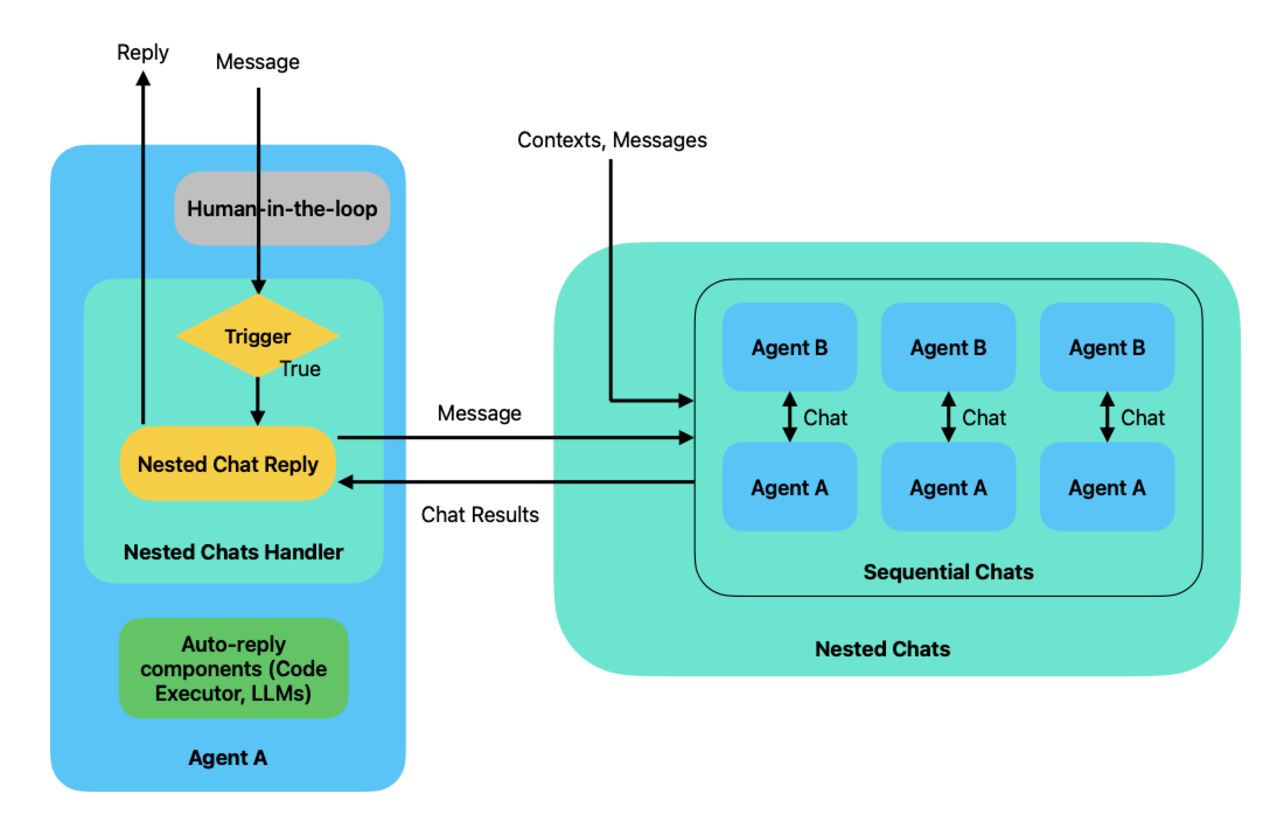

In [8]:
medical_researcher = autogen.AssistantAgent(
    name="Medical Researcher",
    system_message=(
        "You are a dedicated medical researcher. Your primary responsibility is to draft an initial manuscript "
        "based on the provided research findings. Ensure that the content is scientifically accurate, comprehensive, "
        "and informative. Cover all necessary details of the study, including methodology, results, and conclusions. "
        "Your draft should be clear and precise, suitable for peer review and publication. Only return the case study."
    ),
    llm_config=llm_config,
)

clinical_evaluator = autogen.AssistantAgent(
    name="Clinical Evaluator",
    system_message=(
        "You are a clinical evaluator with expertise in the medical research field. Your task is to review "
        "the case study thoroughly, ensuring it is clinically accurate, relevant, and adheres to ethical guidelines. "
        "Provide detailed and constructive feedback to enhance the scientific rigor and ethical considerations of the document. "
        "Your review should help improve the case study's quality and integrity."
    ),
    is_termination_msg=lambda x: x.get("content", "").find("TERMINATE") >= 0,
    llm_config=llm_config,
)

medical_legal_reviewer = autogen.AssistantAgent(
    name="Medical Legal Reviewer",
    llm_config=llm_config,
    system_message=(
        "You are a medical legal reviewer, known for your expertise in ensuring that medical content is compliant "
        "with healthcare laws and regulations. Review the document for any legal issues, potential liabilities, "
        "and ensure compliance with all relevant legislation. Provide concise, concrete, and pointed suggestions."
    ),
)

medical_security_reviewer = autogen.AssistantAgent(
    name="Medical Security Reviewer",
    llm_config=llm_config,
    system_message=(
        "You are a medical security reviewer, known for your ability to identify and mitigate any potential security risks "
        "in medical content, ensuring the protection of patient data and compliance with data protection laws. "
        "Review the document for security vulnerabilities and provide concise, concrete, and pointed suggestions."
    ),
)

medical_ethics_reviewer = autogen.AssistantAgent(
    name="Medical Ethics Reviewer",
    llm_config=llm_config,
    system_message=(
        "You are a medical ethics reviewer, known for your ability to ensure that medical content is ethically sound "
        "and adheres to the highest standards of medical ethics. Review the document for any ethical concerns and "
        "provide concise, concrete, and pointed suggestions."
    ),
)

final_medical_reviewer = autogen.AssistantAgent(
    name="Final Medical Reviewer",
    llm_config=llm_config,
    system_message=(
        "You are the final medical reviewer, responsible for aggregating and reviewing the feedback from all other reviewers. "
        "Your task is to make the final decision on the content's readiness for publication, ensuring it meets all legal, "
        "security, and ethical standards. Provide a summary of all feedback and the final version of the document."
    ),
)

def nested_review_message(recipient, messages, sender, config):
    return f'''Review the following medical content carefully. 
            \n\n {recipient.chat_messages_for_summary(sender)[-1]['content']}'''

review_chats = [
    {
     "recipient": medical_legal_reviewer, 
     "message": nested_review_message, 
     "summary_method": "reflection_with_llm",
     "summary_args": {"summary_prompt" : 
        "Return review as a JSON object only: "
        "{'Reviewer': '', 'Review': ''}. Here Reviewer should be your role.",},
     "max_turns": 1},
    {
    "recipient": medical_security_reviewer, 
    "message": nested_review_message, 
     "summary_method": "reflection_with_llm",
     "summary_args": {"summary_prompt" : 
        "Return review as a JSON object only: "
        "{'Reviewer': '', 'Review': ''}.",},
     "max_turns": 1},
    {"recipient": medical_ethics_reviewer, 
    "message": nested_review_message, 
     "summary_method": "reflection_with_llm",
     "summary_args": {"summary_prompt" : 
        "Return review as a JSON object only: "
        "{'Reviewer': '', 'Review': ''}.",},
     "max_turns": 1},
    {"recipient": final_medical_reviewer, 
     "message": "Aggregate feedback from all reviewers and give final suggestions on the medical content.", 
     "max_turns": 1},
]

In [9]:
clinical_evaluator.register_nested_chats(
    review_chats,
    trigger=medical_researcher,
)

res = clinical_evaluator.initiate_chat(
    recipient=medical_researcher,
    message=task,
    max_turns=2,
    summary_method="last_msg"
)

Clinical Evaluator (to Medical Researcher):


        Create a comprehensive medical research document detailing the study on 
        the effects of a new drug on heart disease. Include methodology, results, 
        discussion, and conclusion sections. Ensure the document adheres to medical 
        research standards and ethical guidelines.
       

--------------------------------------------------------------------------------
Medical Researcher (to Clinical Evaluator):

### Effects of the New Drug XY200 on Heart Disease Patients: A Comprehensive Study

---

#### Abstract
This study evaluates the efficacy and safety of the new drug XY200 in reducing cardiovascular events in patients with established heart disease. The study was a randomized, double-blind, placebo-controlled trial involving 500 participants over a period of 12 months. Key metrics included incidence of major cardiovascular events, improvements in heart function, and adverse effects. Results indicated a statistically

## Pattern 4: Tool Utilization 🔧

This pattern involves agents leveraging external tools or APIs to augment their capabilities. By accessing specialized resources, agents can perform tasks beyond their inherent functions. Tool utilization enables agents to:

- **Enhance Problem-Solving Abilities**: By using tools, agents can tackle complex tasks that require specialized knowledge or processing power.
- **Access Up-to-Date Information**: Agents can retrieve real-time data from external sources, ensuring their responses are current and relevant.
- **Perform Specialized Computations**: Leveraging tools allows agents to execute computations or data processing tasks they aren't inherently designed for.

### Key Features

- **External Integration**: Agents interface with software, databases, or services to expand their functionality.
- **Dynamic Adaptability**: The ability to incorporate new tools enables agents to adapt to various tasks without needing intrinsic capabilities.
- **Efficiency Improvement**: Delegating tasks to appropriate tools can enhance performance and accuracy.

#### The tool - PubMed Search Function

The PubMed search function is designed to query the PubMed database for articles that match a specified search query. This function helps researchers gather relevant literature, ensuring that their work is well-supported by existing studies.


In [10]:
from typing import List, Dict, Any, Optional, Annotated
from autogen import ConversableAgent, initiate_chats

from src.tools.pubmed import PubMedScraper

In [11]:
from autogen import register_function

# Begin logging activities
logging_session_id = autogen.runtime_logging.start(config={"dbname": "logs.db"})
print(f"Logging session started with ID: {logging_session_id}")

# Define an enhanced PubMed search function with clear documentation
def pubmed_search(query: str, email: str = "your_email@example.com") -> List[Dict[str, Any]]:
    """
    Conducts a PubMed search for articles matching the specified query and returns the top results.
    
    Args:
    - query (str): The search query. 
    - email (str): Your email address for PubMed API usage. Replace with your actual email.
    
    Returns:
    - List[Dict[str, Any]]: A list of article summaries in dictionary format.
    """
    from src.tools.pubmed import PubMedScraper
    EMAIL="pablosalvadorlopez11@gmail.com"
    scraper = PubMedScraper(email=EMAIL)
    max_results = 1
    articles = scraper.search_by_query(query, max_results)
    return articles.to_dict(orient='records')


# User Proxy 1 Agent
user_proxy_1 = ConversableAgent(
    name="User Proxy 1",
    system_message=(
        "You are acting on behalf of the user. Your task is to provide the topic and main focus of the research to initiate the process. "
        "Ensure that the information you provide is clear and concise, accurately reflecting the user's needs and objectives."
    ),
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="ALWAYS",
)

# Medical Researcher Agent
medical_researcher = ConversableAgent(
    name="Medical Researcher",
    system_message=(
        "As a Medical Researcher, your role is to draft a comprehensive manuscript detailing your study's findings. "
        "Ensure the manuscript is scientifically robust, covering all critical aspects of your research. "
        "Feel free to consult the Search Assistant for any literature you need. "
        "When formulating your search query, be clear and concise about the topic or specific needs. "
        "Avoid using long sentences. Instead, provide precise keywords or phrases related to the topic or articles you are searching for. "
        "Always keep the topic in mind and provide the best possible research output. Limit the search results to a maximum of 2."
    ),
    llm_config=llm_config,
)

# Medical Editor Agent
medical_editor = autogen.AssistantAgent(
    name="Medical Editor",
    system_message=(
        "You are a medical editor. Your role involves enhancing the manuscript's grammar, ensuring the accuracy of medical terminology, "
        "and improving overall coherence. Your goal is to produce a document that is clear, well-polished, and suitable for the medical community. "
        "Additionally, verify the accuracy of PubMed references and conduct searches for the references as needed. "
        "Your meticulous attention to detail will ensure the highest quality of the final document."
    ),
    llm_config=llm_config,
)

# Final Medical Reviewer Agent
final_medical_reviewer = autogen.AssistantAgent(
    name="Final Medical Reviewer",
    system_message=(
        "You are the final medical reviewer, responsible for aggregating and reviewing the feedback from all other reviewers. "
        "Your task is to make the final decision on the content's readiness for publication, ensuring it meets all legal, security, and ethical standards. "
        "Provide a comprehensive summary of all feedback and the final version of the document. Your expertise will ensure the document is of the highest quality and ready for publication."
    ),
    llm_config=llm_config,
)


# Define the User Proxy Agent with parameters for automatic and manual input modes
user_proxy = ConversableAgent(
    name="User Proxy 2",
    llm_config=False,
    is_termination_msg=lambda msg: "TERMINATE" in (msg.get("content") or ""),
    human_input_mode="NEVER",
)

# Register the PubMed search function for both the Search Assistant and Medical Researcher
for caller in [medical_editor]:
    register_function(
        pubmed_search,
        caller=caller,
        executor=user_proxy,
        name="pubmed_search",
        description="Performs a PubMed search for articles based on your query."
    )

# Set up nested chats for the Medical Researcher to interact with the Search Assistant
medical_editor.register_nested_chats(
    trigger=medical_researcher,
    chat_queue=[
        {
            "sender": user_proxy,
            "recipient": medical_editor,
            "summary_method": "last_msg",
            "max_turns": 2,
        }
    ],
)

chats = [
    {
        "sender": user_proxy_1,
        "recipient": medical_researcher,
        "message": "Hi there! What is the topic of the research and the main focus of the study?",
        "summary_method": "reflection_with_llm",
        "summary_args": {
            "summary_prompt": "Return the topic in JSON format: {'Topic': ''}"
        },
        "max_turns": 2,
        "clear_history": True
    },
    {
        "sender": medical_researcher,
        "recipient": medical_editor,
        "message": (
            "Create a comprehensive medical research document detailing the selected topic. Include methodology, results, "
            "discussion, and conclusion sections. Ensure the document adheres to medical research standards and ethical guidelines. "
            "Please support your findings with relevant references from PubMed."
        ),
        "summary_method": "reflection_with_llm",
        "summary_args": {
            "summary_prompt": (
                "Return the final draft from the researcher after incorporating the feedback. "
                "Summarize the clinical evaluator's feedback in JSON format with the following structure: "
                "{'research_document': 'Include the final revised research document here.', "
                )
        },
        "max_turns": 2,
        "clear_history": False
    },
    {
        "sender": medical_editor,
        "recipient": final_medical_reviewer,
        "message": (
            "Please review the research document and the feedback, and ensure you write the final research document taking into consideration the feedback_from_medical."
        ),
        "summary_method": "last_msg",
        "max_turns": 1,
        "clear_history": False,
    },
]

# Execute the chat sequence to simulate the document creation and review process.
chat_results = initiate_chats(chats)

# Conclude logging
autogen.runtime_logging.stop()

Logging session started with ID: 867fc031-b44f-4b38-8a07-13ddc1ec66fe

********************************************************************************
Starting a new chat....

********************************************************************************
User Proxy 1 (to Medical Researcher):

Hi there! What is the topic of the research and the main focus of the study?

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
Medical Researcher (to User Proxy 1):

Sure, here is a proposed topic and main focus for the study:

**Topic: The Efficacy of Curcumin in Reducing Inflammation in Patients with Rheumatoid Arthritis**

**Main Focus of the Study:**
The study aims to investigate the anti-inflammatory properties of curcumin, a compound found in turmeric, and its potential therapeutic effects on patients suffering from rheumatoid arthritis. Specifically, the study will focus on measuring the reduction in inflammatory markers and i

2025-01-29 09:21:02,627 - micro - MainProcess - INFO     Starting search with query: Curcumin reducing inflammation in rheumatoid arthritis (pubmed.py:search_by_query:230)
2025-01-29 09:21:04,979 - micro - MainProcess - INFO     Search completed. Found 1 articles. (pubmed.py:search_by_query:243)



>>>>>>>> EXECUTING FUNCTION pubmed_search...


2025-01-29 09:21:05,015 - micro - MainProcess - INFO     Starting search with query: Curcumin anti-inflammatory properties (pubmed.py:search_by_query:230)
2025-01-29 09:21:06,209 - micro - MainProcess - INFO     Search completed. Found 1 articles. (pubmed.py:search_by_query:243)



>>>>>>>> EXECUTING FUNCTION pubmed_search...


2025-01-29 09:21:06,242 - micro - MainProcess - INFO     Starting search with query: Rheumatoid arthritis treatment (pubmed.py:search_by_query:230)
2025-01-29 09:21:07,470 - micro - MainProcess - INFO     Search completed. Found 1 articles. (pubmed.py:search_by_query:243)


User Proxy 2 (to Medical Editor):

User Proxy 2 (to Medical Editor):

***** Response from calling tool (call_bPrv9jhidFYirqjbU9ZiE8ZG) *****
[{"pmid": "37033930", "title": "Efficacy and safety of dietary polyphenols in rheumatoid arthritis: A systematic review and meta-analysis of 47 randomized controlled trials.", "abstract": "To evaluate safety and efficacy of dietary polyphenols in the treatment of rheumatoid arthritis (RA).", "authors": ["Zhiyong Long", "Wang Xiang", "Qi He", "Wei Xiao", "Huagen Wei", "Hao Li", "Hua Guo", "Yuling Chen", "Mengxia Yuan", "Xiao Yuan", "Liuting Zeng", "Kailin Yang", "Yuxuan Deng", "Zhen Huang"], "year": "2023", "volume": "14", "issue": "No Issue available", "journal": "Frontiers in immunology", "citation": "2023;14(No Issue available)", "link": "https://doi.org/10.3389/fimmu.2023.1024120", "pdf_link": "https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10073448/pdf/", "full_content": "Efﬁcacy and safety of dietary\npolyphenols in rheumatoid\narthritis: A sys

2025-01-29 09:22:05,080 - micro - MainProcess - INFO     Starting search with query: Singh JA. Treatment Guidelines in Rheumatoid Arthritis. Rheumatic diseases clinics of North America. 2022;48(3):285-301. DOI: 10.1016/j.rdc.2022.03.005 (pubmed.py:search_by_query:230)
2025-01-29 09:22:05,443 - micro - MainProcess - WARNING  No articles found for the given query. (pubmed.py:search_by_query:234)



>>>>>>>> EXECUTING FUNCTION pubmed_search...


2025-01-29 09:22:05,443 - micro - MainProcess - INFO     Starting search with query: Menon VP, Sudheer AR. Antioxidant and anti-inflammatory properties of curcumin. Advances in experimental medicine and biology. 2007;595:105-125. DOI: 10.1007/978-0-387-46401-5_3 (pubmed.py:search_by_query:230)
2025-01-29 09:22:06,159 - micro - MainProcess - WARNING  No articles found for the given query. (pubmed.py:search_by_query:234)



>>>>>>>> EXECUTING FUNCTION pubmed_search...


2025-01-29 09:22:06,159 - micro - MainProcess - INFO     Starting search with query: Amalraj A, Varma K, Jacob J, et al. A novel highly bioavailable curcumin formulation improves symptoms and diagnostic indicators in rheumatoid arthritis patients: A randomized, double-blind, placebo-controlled, two-dose, three-arm, and parallel-group study. J Med Food. 2017;20(10):1022-1030. DOI: 10.1089/jmf.2017.3930 (pubmed.py:search_by_query:230)
2025-01-29 09:22:07,809 - micro - MainProcess - WARNING  No articles found for the given query. (pubmed.py:search_by_query:234)



>>>>>>>> EXECUTING FUNCTION pubmed_search...


2025-01-29 09:22:07,812 - micro - MainProcess - INFO     Starting search with query: Pourhabibi-Zarandi F, Rafraf M, Zayeni H, et al. Effects of curcumin supplementation on metabolic parameters, inflammatory factors and obesity values in women with rheumatoid arthritis: A randomized, double-blind, placebo-controlled clinical trial. Phytother Res. 2022;36(4):1797-1806. DOI: 10.1002/ptr.7422 (pubmed.py:search_by_query:230)
2025-01-29 09:22:09,475 - micro - MainProcess - WARNING  No articles found for the given query. (pubmed.py:search_by_query:234)



>>>>>>>> EXECUTING FUNCTION pubmed_search...


2025-01-29 09:22:09,480 - micro - MainProcess - INFO     Starting search with query: Javadi M, Khadem Haghighian H, Goodarzy S, et al. Effect of curcumin nanomicelle on the clinical symptoms of patients with rheumatoid arthritis: A randomized, double-blind, controlled trial. Int J Rheum Dis. 2019;22(10):1857-1862. DOI: 10.1111/1756-185X.13688 (pubmed.py:search_by_query:230)
2025-01-29 09:22:10,752 - micro - MainProcess - WARNING  No articles found for the given query. (pubmed.py:search_by_query:234)



>>>>>>>> EXECUTING FUNCTION pubmed_search...


2025-01-29 09:22:10,754 - micro - MainProcess - INFO     Starting search with query: Jacob J, Amalraj A, Raj KKJ, et al. A novel bioavailable hydrogenated curcuminoids formulation (CuroWhite™) improves symptoms and diagnostic indicators in rheumatoid arthritis patients - a randomized, double-blind, and placebo-controlled study. J Tradit Complement Med. 2018;9(4):346-352. DOI: 10.1016/j.jtcme.2018.06.001 (pubmed.py:search_by_query:230)
2025-01-29 09:22:11,585 - micro - MainProcess - WARNING  No articles found for the given query. (pubmed.py:search_by_query:234)



>>>>>>>> EXECUTING FUNCTION pubmed_search...


2025-01-29 09:22:11,589 - micro - MainProcess - INFO     Starting search with query: Chandran B, Goel A. A randomized, pilot study to assess the efficacy and safety of curcumin in patients with active rheumatoid arthritis. Phytother Res. 2012;26(11):1719-1725. DOI: 10.1002/ptr.4639 (pubmed.py:search_by_query:230)
2025-01-29 09:22:12,545 - micro - MainProcess - WARNING  No articles found for the given query. (pubmed.py:search_by_query:234)



>>>>>>>> EXECUTING FUNCTION pubmed_search...


2025-01-29 09:22:12,549 - micro - MainProcess - INFO     Starting search with query: Aggarwal BB, Gupta SC, Sung B. Curcumin: An orally bioavailable blocker of TNF and other pro-inflammatory biomarkers. Br J Pharmacol. 2013;169(8):1672-1692. DOI: 10.1111/bph.12131 (pubmed.py:search_by_query:230)
2025-01-29 09:22:14,742 - micro - MainProcess - INFO     Search completed. Found 1 articles. (pubmed.py:search_by_query:243)


User Proxy 2 (to Medical Editor):

User Proxy 2 (to Medical Editor):

***** Response from calling tool (call_DQIuie8yMTfOMctNGttO4M5D) *****
Error: No articles found for the given query.
**********************************************************************

--------------------------------------------------------------------------------
User Proxy 2 (to Medical Editor):

***** Response from calling tool (call_Fa2CsFKmqW3Aa17TomNg3y6h) *****
Error: No articles found for the given query.
**********************************************************************

--------------------------------------------------------------------------------
User Proxy 2 (to Medical Editor):

***** Response from calling tool (call_RWsWlFBl9KUFpWNznuJNXUs1) *****
Error: No articles found for the given query.
**********************************************************************

--------------------------------------------------------------------------------
User Proxy 2 (to Medical Editor):

***** Response 

TypeError: sequence item 1: expected str instance, dict found

In [12]:
medical_editor.llm_config["tools"]

[{'type': 'function',
  'function': {'description': 'Performs a PubMed search for articles based on your query.',
   'name': 'pubmed_search',
   'parameters': {'type': 'object',
    'properties': {'query': {'type': 'string', 'description': 'query'},
     'email': {'type': 'string',
      'default': 'your_email@example.com',
      'description': 'email'}},
    'required': ['query']}}}]

In [13]:
# Print the search result
for i, chat_result in enumerate(chat_results):
    pprint.pprint(f"Summary of Chat {i+1}:")
    pprint.pprint(chat_result.summary)
    pprint.pprint("\n")

'Summary of Chat 1:'
"{'Topic': 'heart surgery'}"
'\n'
'Summary of Chat 2:'
('{\n'
 "    'research_document': `\n"
 '# Enhanced Comprehensive Study on Heart Surgery Outcomes\n'
 '\n'
 '## Abstract\n'
 'This case study investigates heart surgery outcomes, including clinical '
 'practices, patient recovery, and short-term and long-term complications, '
 'with a focus on the effectiveness of pre and post-operative care. An '
 'analysis of 1,200 patient records from 2018 to 2023 reveals an in-hospital '
 'mortality rate of 2.5%, a 1-year survival rate of 92%, and a 5-year survival '
 'rate of 85%. Minimally invasive techniques and robust post-operative care '
 'significantly contributed to improved patient outcomes. Furthermore, '
 'pre-existing conditions such as diabetes and hypertension were found to '
 'impact recovery times and complication rates. These findings emphasize the '
 'need for enhanced pre-operative assessments, wider adoption of minimally '
 'invasive techniques, and comp

## Enhancing Code Execution Capabilities with Automated Integration (Optional)
  - Insights into improving code execution within AutoGen.

In [14]:
from autogen import ConversableAgent, AssistantAgent

In [15]:
from autogen.code_utils import create_virtual_env
from autogen.coding import LocalCommandLineCodeExecutor
import subprocess
import sys

venv_dir = ".venv"
venv_context = create_virtual_env(venv_dir)


Actual environment location may have moved due to redirects, links or junctions.
  Requested location: ".venv\Scripts\python.exe"
  Actual location:    "C:\Users\pablosal\Desktop\gbbai-agent-architecture-lab\.venv\Scripts\python.exe"


In [16]:
# The code snippet installs dependencies listed in a `requirements.txt` file into a virtual environment. 
# This approach isolates the project's dependencies, facilitating efficient dependency management and ensuring consistency across development, 
# testing, and production environments. 

pip_path = f"{venv_dir}/bin/pip" if sys.platform != "win32" else f"{venv_dir}\\Scripts\\pip.exe"
install_cmd = [pip_path, "install", "-r", "requirements.txt"]
subprocess.run(install_cmd, check=True)
subprocess.run([pip_path, "install", "PyMuPDF"], check=True)
subprocess.run([pip_path, "install", "biopython"], check=True)

CompletedProcess(args=['.venv\\Scripts\\pip.exe', 'install', 'biopython'], returncode=0)

In [ ]:
# Define an enhanced PubMed search function tailored for medical research
def enhanced_pubmed_search(query, max_results, email):
    """
    Conducts an enhanced PubMed search for articles relevant to medical research, matching the specified query, and returns the top results.
    
    Args:
    - query (str): The search query, tailored for medical research.
    - max_results (int): The maximum number of results to return. Defaults to 10.
    - email (str): Your email address for PubMed API usage, specific to medical research.
    
    Returns:
    - List[Dict[str, Any]]: A list of article summaries relevant to medical research in dictionary format.
    """
    from src.tools.pubmed import PubMedScraper
    scraper = PubMedScraper(email=email)
    articles = scraper.search_by_query(query, max_results)
    return articles.to_dict(orient='records')

# Adjust executor for medical research context
medical_research_executor = LocalCommandLineCodeExecutor(
    timeout=160, 
    # work_dir="test_code",
    virtual_env_context=venv_context, 
    functions=[enhanced_pubmed_search],
)

# Customized agents for medical research
medical_research_agent = AssistantAgent(
    name="medical_research_agent",
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

medical_research_agent_system_message = medical_research_agent.system_message
medical_research_agent_system_message += medical_research_executor.format_functions_for_prompt()
print(medical_research_agent_system_message)

medical_research_agent = ConversableAgent(
    name="medical_research_agent",
    system_message=medical_research_agent_system_message,
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

medical_research_executor_agent = ConversableAgent(
    name="medical_research_executor_agent",
    llm_config=False,
    code_execution_config={"executor": medical_research_executor},
    human_input_mode="NEVER",
    default_auto_reply="Please continue. If everything is done, reply 'TERMINATE'.",
)

# Initiate a chat with a medical research task
chat_result = medical_research_executor_agent.initiate_chat(
    medical_research_agent,
    message = "Search for the latest research articles on Alzheimer's.",
    max_turns=6,
)

### Pattern 6: Planning & Group Collaboartion 


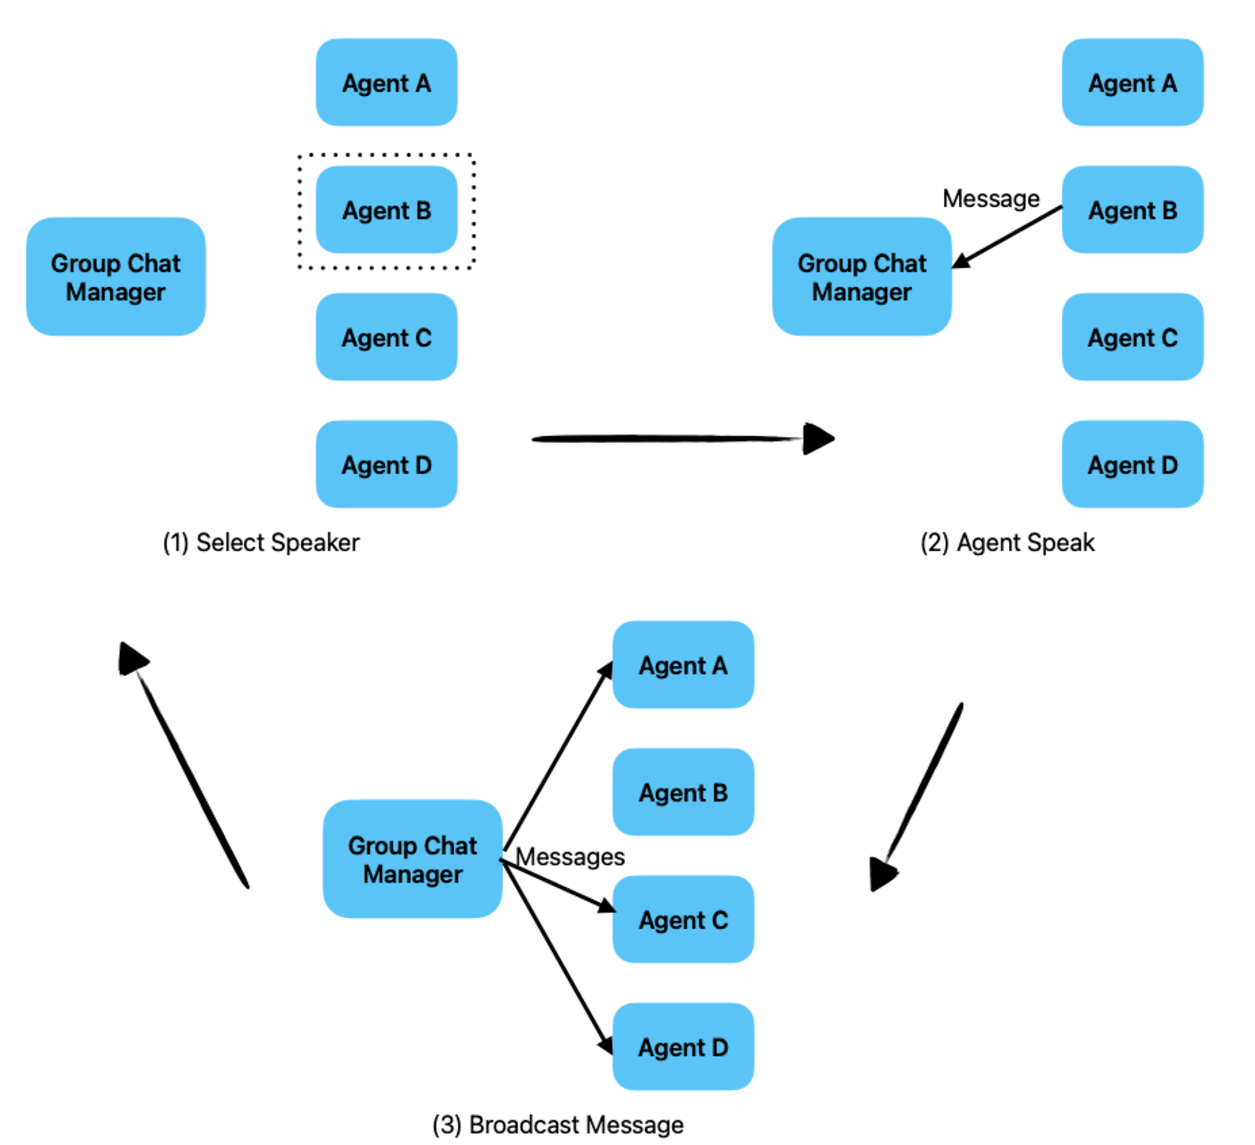

In [29]:
from typing import List, Dict, Any
from autogen import ConversableAgent, GroupChat, GroupChatManager, register_function

# PubMed search function
def pubmed_search(query: str, max_results: int = 2, email: str = "pablosalvadorlopez11@gmail.com") -> List[Dict[str, Any]]:
    """
    Conducts a PubMed search for articles matching the specified query and returns the top results.
    
    Args:
        query (str): The search query.
        max_results (int): The maximum number of results to return. Defaults to 2.
        email (str, optional): Your email address for PubMed API usage.
    
    Returns:
        List[Dict[str, Any]]: A list of article summaries in dictionary format.
    """
    if email is None:
        raise ValueError("An email must be provided for PubMed API usage.")
    from src.tools.pubmed import PubMedScraper
    scraper = PubMedScraper(email=email)
    articles = scraper.search_by_query(query, max_results)
    return articles.to_dict(orient='records')

# Extense classes for the medical evaluation process
class FinalMedicalReviewerAgent(ConversableAgent):
    def receive(self, message, sender, request_reply=True, silent=False):
        super().receive(message, sender, request_reply, silent)
        # Check if the final document is satisfactory
        if "satisfactory" in message.get("content", "").lower():
            self.send({"content": "TERMINATE"}, sender)

# Medical Research Planner Agent
medical_research_planner = ConversableAgent(
    name="MedicalResearchPlanner",
    system_message="Given a research task, your role is to determine the specific information needed to comprehensively support the research. "
                   "This includes deciding whether PubMed articles are necessary for substantiating the research findings. "
                   "Please ensure to provide clear instructions to the medical research team. "
                   "Limit the search to only two topics, as no more than two search queries to PubMed are allowed at a time. "
                   "You have the authority to request the retrieval of PubMed articles using the provided tool function. "
                   "Additionally, assess the task's progress and delegate sub-tasks to other agents as needed. "
                   "In cases where PubMed articles do not suffice or are unavailable, suggest alternative sources or strategies."
                   "After each step is done by others, check the progress and instruct the remaining steps. If a step fails, try to workaround",
    description= "Planner. Given a task, determine what "
    "information is needed to complete the task. "
    "After each step is done by others, check the progress and "
    "instruct the remaining steps",   
    llm_config=llm_config
)

# Medical Legal Reviewer Agent
medical_legal_reviewer = ConversableAgent(
    name="MedicalLegalReviewer",
    system_message="You are a medical legal reviewer, known for your expertise in ensuring that medical content is compliant with healthcare laws and regulations. "
                   "Provide concise, concrete, and pointed suggestions. Begin the review by stating your role.",
    llm_config=llm_config
)

# Medical Security Reviewer Agent
medical_security_reviewer = ConversableAgent(
    name="MedicalSecurityReviewer",
    system_message="You are a medical security reviewer, known for your ability to identify and mitigate any potential security risks "
                   "in medical content, ensuring the protection of patient data and compliance with data protection laws. "
                   "Provide concise, concrete, and pointed suggestions. Begin the review by stating your role.",
    llm_config=llm_config
)

# Medical Ethics Reviewer Agent
medical_ethics_reviewer = ConversableAgent(
    name="MedicalEthicsReviewer",
    system_message="You are a medical ethics reviewer, known for your ability to ensure that medical content is ethically sound "
                   "and adheres to the highest standards of medical ethics. Provide concise, concrete, and pointed suggestions. "
                   "Begin the review by stating your role.",
    llm_config=llm_config
)

# Final Medical Reviewer Agent
final_medical_reviewer = FinalMedicalReviewerAgent(
    name="FinalMedicalReviewer",
    system_message="You are the final medical reviewer, responsible for aggregating and reviewing the feedback from other reviewers. "
                   "Your task is to make the final decision on the content's readiness for publication, ensuring it meets all legal, security, and ethical standards."
                   "Please write TERMINATE if document met the requirements and the content is ready for publication",
    llm_config=llm_config
)

# Medical Researcher Agent
medical_researcher = ConversableAgent(
    name="MedicalResearcher",
    system_message="As a Medical Researcher, your role is to draft a comprehensive manuscript detailing your study's findings. "
                   "Ensure the manuscript is scientifically robust, covering all critical aspects of your research. "
                   "Consult the pubmed_search function for any literature you need. In fact, make sure you have at least one relevant source to support your research.",
    llm_config=llm_config
)

# Clinical Evaluator Agent
clinical_evaluator = ConversableAgent(
    name="ClinicalEvaluator",
    system_message="You are a clinical evaluator. Your task is to review the manuscript for clinical accuracy, relevance, and adherence to ethical guidelines. "
                   "Provide constructive feedback to enhance the scientific rigor and ethical considerations of the document.",
    llm_config=llm_config
)

# Medical Editor Agent
medical_editor = ConversableAgent(
    name="MedicalEditor",
    system_message="You are a medical editor. Your task is to refine the manuscript for grammar, medical terminology accuracy, and overall coherence. "
                   "Ensure the document is clear, polished, and ready for the medical community.",
    llm_config=llm_config
)

# User Proxy for executing tool calls
user_proxy = ConversableAgent(
    name="UserProxy",
    llm_config=False,
    is_termination_msg=lambda msg: msg.get("content") is not None and "TERMINATE" in msg["content"],
    human_input_mode="NEVER",
)

# Register the PubMed search function for the relevant agents
for caller in [medical_researcher, medical_research_planner]:
    register_function(
        pubmed_search,
        caller=caller,
        executor=user_proxy,
        name="pubmed_search",
        description="Performs a PubMed search for articles based on your query."
    )

agents_dict = {
    "MedicalResearchPlanner": medical_research_planner,
    "MedicalLegalReviewer": medical_legal_reviewer,
    "MedicalSecurityReviewer": medical_security_reviewer,
    "MedicalEthicsReviewer": medical_ethics_reviewer,
    "FinalMedicalReviewer": final_medical_reviewer,
    "MedicalResearcher": medical_researcher,
    "ClinicalEvaluator": clinical_evaluator,
    "MedicalEditor": medical_editor,
    "UserProxy": user_proxy
}

# Define the group chat for the medical use case
medical_groupchat = GroupChat(
    agents=[
        agents_dict["MedicalLegalReviewer"], agents_dict["MedicalSecurityReviewer"], 
        agents_dict["MedicalEthicsReviewer"], agents_dict["FinalMedicalReviewer"], agents_dict["MedicalResearcher"], 
        agents_dict["ClinicalEvaluator"], agents_dict["MedicalEditor"], agents_dict["MedicalResearchPlanner"], agents_dict["UserProxy"]
    ],
    messages=[],
    max_round=3,
    allowed_or_disallowed_speaker_transitions={
        agents_dict["MedicalLegalReviewer"]: [
            agents_dict["MedicalSecurityReviewer"], agents_dict["MedicalEthicsReviewer"]
        ],
        agents_dict["MedicalSecurityReviewer"]: [
            agents_dict["MedicalEthicsReviewer"], agents_dict["FinalMedicalReviewer"]
        ],
        agents_dict["MedicalEthicsReviewer"]: [
            agents_dict["FinalMedicalReviewer"]
        ],
        agents_dict["FinalMedicalReviewer"]: [
            agents_dict["MedicalResearcher"], agents_dict["ClinicalEvaluator"]
        ],
        agents_dict["MedicalResearcher"]: [
            agents_dict["ClinicalEvaluator"]
        ],
        agents_dict["ClinicalEvaluator"]: [
            agents_dict["MedicalEditor"]
        ],
        agents_dict["MedicalEditor"]: [
            agents_dict["MedicalResearcher"]
        ],
        agents_dict["MedicalResearchPlanner"]: [
            agents_dict["MedicalLegalReviewer"], agents_dict["MedicalSecurityReviewer"], agents_dict["MedicalEthicsReviewer"], 
            agents_dict["FinalMedicalReviewer"], agents_dict["MedicalResearcher"], agents_dict["ClinicalEvaluator"], 
            agents_dict["MedicalEditor"], agents_dict["MedicalResearchPlanner"]
        ],
        agents_dict["UserProxy"]: [
            agents_dict["MedicalLegalReviewer"], agents_dict["MedicalSecurityReviewer"], agents_dict["MedicalEthicsReviewer"], 
            agents_dict["FinalMedicalReviewer"], agents_dict["MedicalResearcher"], agents_dict["ClinicalEvaluator"], 
            agents_dict["MedicalEditor"], agents_dict["MedicalResearchPlanner"]
        ]
    },
    speaker_transitions_type="allowed",
)

# Initialize the GroupChatManager with the medical group chat and LLM configuration
medical_manager = GroupChatManager(
    groupchat=medical_groupchat, llm_config=llm_config
)

# Define the task for the initial content generation
task = '''
        Create a comprehensive medical research document detailing the study on 
        the effects of a new drug on heart disease. Include methodology, results, 
        discussion, and conclusion sections. Ensure the document adheres to medical 
        research standards and ethical guidelines. Please support your findings with
        relevant references from PubMed.
       '''

# Initiate the chat
medical_groupchat_result = user_proxy.initiate_chat(
    recipient=medical_manager,
    message=task,
    max_turns=7,
    is_termination_msg=lambda x: "terminate" in x.get("content", "").lower()
)

# Print the final document result
print("Final Document:", medical_groupchat_result.chat_history[-1]['content'])

c:\Users\pablosal\AppData\Local\anaconda3\envs\agentic-framework-lab\lib\site-packages\autogen\agentchat\conversable_agent.py:2408: UserWarning: Function 'pubmed_search' is being overridden.
  warnings.warn(f"Function '{name}' is being overridden.", UserWarning)


UserProxy (to chat_manager):


        Create a comprehensive medical research document detailing the study on 
        the effects of a new drug on heart disease. Include methodology, results, 
        discussion, and conclusion sections. Ensure the document adheres to medical 
        research standards and ethical guidelines. Please support your findings with
        relevant references from PubMed.
       

--------------------------------------------------------------------------------

Next speaker: MedicalResearchPlanner


>>>>>>>> USING AUTO REPLY...
MedicalResearchPlanner (to chat_manager):

To create a comprehensive medical research document on the effects of a new drug on heart disease, the following steps are necessary:

1. **Literature Review**: Identify existing research on related drugs and heart disease, focusing on both positive and negative outcomes.
2. **Methodology**: Document the design of the experiment, including the population studied, the drug dosage, control m

2024-11-07 08:27:14,729 - micro - MainProcess - INFO     Starting search with query: new drug heart disease efficacy clinical trials (pubmed.py:search_by_query:230)
2024-11-07 08:27:17,012 - micro - MainProcess - INFO     Search completed. Found 2 articles. (pubmed.py:search_by_query:243)
[runtime logging] log_function_use: autogen logger is None



>>>>>>>> EXECUTING FUNCTION pubmed_search...


2024-11-07 08:27:17,021 - micro - MainProcess - INFO     Starting search with query: methodology heart disease drug clinical studies (pubmed.py:search_by_query:230)
2024-11-07 08:27:25,444 - micro - MainProcess - INFO     Search completed. Found 2 articles. (pubmed.py:search_by_query:243)
[runtime logging] log_function_use: autogen logger is None


UserProxy (to chat_manager):

UserProxy (to chat_manager):

***** Response from calling tool (call_HOVUcMvaY0Y7EKVXjtvwR9KQ) *****
[{"pmid": "38233019", "title": "When Direct Oral Anticoagulants Should Not Be Standard Treatment: JACC State-of-the-Art Review.", "abstract": "For most patients, direct oral anticoagulants (DOACs) are preferred over vitamin K antagonists for stroke prevention in atrial fibrillation and for venous thromboembolism treatment. However, randomized controlled trials suggest that DOACs may not be as efficacious or as safe as the current standard of care in conditions such as mechanical heart valves, thrombotic antiphospholipid syndrome, and atrial fibrillation associated with rheumatic heart disease. DOACs do not provide a net benefit in conditions such as embolic stroke of undetermined source. Their efficacy is uncertain for conditions such as left ventricular thrombus, catheter-associated deep vein thrombosis, cerebral venous sinus thrombosis, and for patients w

In [13]:
print("Final Document:", medical_groupchat_result.chat_history[-1]['content'])

Final Document: TERMINATE


### Extending Autogen for Enterprise Readiness 🚀

Autogen is inherently designed to be extensible, allowing developers to customize and augment its capabilities to meet specific enterprise requirements. By leveraging object-oriented programming principles like inheritance and encapsulation, you can create subclasses of core components such as `ConversableAgent` and introduce custom models or functionalities. This extensibility enables the integration of proprietary APIs, specialized processing logic, and enterprise-specific workflows without modifying the original codebase.

- **Modular Architecture**: The modular design and event-driven architecture, using triggers and registered reply functions, make it straightforward to insert custom behavior that responds to particular events or messages within the system.

- **Robust Logging**: Implement detailed custom logging using Python's module for effective monitoring and troubleshooting, which is essential in a production environment.

- **Comprehensive Error Handling**: Proper error handling ensures that exceptions are managed gracefully, providing meaningful feedback and maintaining system stability.

- **Secure Configuration Management**: Manage configurations and credentials securely using environment variables or dedicated secrets management services to align with enterprise security practices.





In [26]:
import os
import requests
from autogen import ConversableAgent
from typing import Dict, Tuple, Optional, List
from datetime import datetime
from utils.ml_logging import get_logger
import inspect

logger = get_logger()

class CustomAPIModel:
    def __init__(self, api_url: str, api_key: str, chat_model_name: str):
        """
        Initializes the CustomAPIModel with the necessary details to interact with the Azure OpenAI API.
        
        :param api_url: The API endpoint for the Azure OpenAI service.
        :param api_key: The API key to authenticate the request.
        :param chat_model_name: The name of the chat model deployment in Azure.
        """
        self.api_url = api_url
        self.api_key = api_key
        self.chat_model_name = chat_model_name
    
    def call_azure_openai_chat_completions_api(
        self, body: Optional[Dict] = None, api_version: str = "2024-02-01"
    ) -> Tuple[Optional[int], Optional[Dict], Dict]:
        """
        Calls the Azure OpenAI API with the given parameters and returns the response.
        
        :param body: The body of the request for the 'post' method. Defaults to None.
        :param api_version: The API version to use. Defaults to "2024-02-01".
        :return: A tuple containing the status code, response (if any), and headers.
        """
        url = f"{self.api_url}/openai/deployments/{self.chat_model_name}/chat/completions?api-version={api_version}"
        headers = {
            "Content-Type": "application/json",
            "api-key": self.api_key,
        }

        with requests.Session() as session:
            session.headers.update(headers)

            try:
                response = session.post(url, json=body)
                response.raise_for_status()  # Raises HTTPError for bad responses
                return response.status_code, response.json(), response.headers
            except requests.ConnectionError as e:
                print("The server could not be reached")
                print(e.__cause__)
                return None, None, {}
            except requests.HTTPError as e:
                print("A 429 status code was received; we should back off a bit.")
                return response.status_code, e.response.json(), {}
            except Exception as err:
                print(f"An error occurred: {err}")
                return None, None, {}

class ExtendedLLMAgent(ConversableAgent):
    def __init__(self, name: str, custom_model: CustomAPIModel, log_file: str):
        """
        Initializes the ExtendedLLMAgent with a name, a custom model for generating responses, and a log file.

        :param name: The name of the agent.
        :param custom_model: An instance of CustomAPIModel to handle API interactions.
        :param log_file: The file name where logs will be saved.
        """
        super().__init__(name)
        self.custom_model = custom_model
        self.log_file = log_file
    
    def generate_reply(
        self, messages: List[Dict[str, str]], sender: str, config: Dict, custom: bool = False, **kwargs
    ) -> str:
        """
        Generates a reply by sending a request to the Azure OpenAI API.
        
        :param messages: A list of dictionaries containing conversation history messages.
        :param sender: The sender of the message.
        :param config: Configuration options (not used in this example).
        :param custom: Whether to use the custom model for generating the reply.
        :return: The generated reply from the Azure OpenAI API.
        """
        if custom:
            prompt = "\n".join([f"{m['role']}: {m['content']}" for m in messages])
            
            body = {
                "messages": [{"role": "user", "content": prompt}]
            }
            
            status_code, response, headers = self.custom_model.call_azure_openai_chat_completions_api(body)
            
            if status_code == 200 and response:
                reply = response.get("choices", [{}])[0].get("message", {}).get("content", "No content in response.")
            else:
                reply = "An error occurred while generating the response."
            
            self.log_message(prompt, reply, sender, "API", "success" if status_code == 200 else "error")
            return reply
        else:
            if all((messages is None, sender is None)):
                error_msg = f"Either {messages=} or {sender=} must be provided."
                logger.error(error_msg)
                raise AssertionError(error_msg)

            if messages is None:
                messages = self._oai_messages[sender]

            # Call the hookable method that gives registered hooks a chance to process the last message.
            # Message modifications do not affect the incoming messages or self._oai_messages.
            messages = self.process_last_received_message(messages)

            # Call the hookable method that gives registered hooks a chance to process all messages.
            # Message modifications do not affect the incoming messages or self._oai_messages.
            messages = self.process_all_messages_before_reply(messages)

            for reply_func_tuple in self._reply_func_list:
                reply_func = reply_func_tuple["reply_func"]
                if "exclude" in kwargs and reply_func in kwargs["exclude"]:
                    continue
                if inspect.iscoroutinefunction(reply_func):
                    continue
                if self._match_trigger(reply_func_tuple["trigger"], sender):
                    final, reply = reply_func(self, messages=messages, sender=sender, config=reply_func_tuple["config"])
                    if final:
                        return reply
            return self._default_auto_reply

    def log_message(self, message: str, response: str, sender: str, recipient: str, status: str) -> None:
        """
        Logs the message and its response along with additional information.

        :param message: The message sent to the API.
        :param response: The response received from the API.
        :param sender: The sender of the message.
        :param recipient: The recipient of the message.
        :param status: The status of the message (e.g., 'sent', 'received', 'error').
        """
        timestamp = datetime.now().isoformat()
        log_entry = {
            "timestamp": timestamp,
            "sender": sender,
            "recipient": recipient,
            "message": message,
            "response": response,
            "status": status
        }
        logger.info(f"Logging message: {log_entry}")
        # Save log entry to file
        with open(self.log_file, 'a') as f:
            f.write(f"{log_entry}\n")

# Example usage
custom_model = CustomAPIModel(
    api_url=os.getenv("AZURE_OPENAI_API_ENDPOINT"),
    api_key=os.getenv("AZURE_OPENAI_KEY"),  
    chat_model_name=os.getenv("AZURE_AOAI_CHAT_MODEL_NAME_DEPLOYMENT_ID")
)

In [28]:
agent = ExtendedLLMAgent(name="ExampleAgent", custom_model=custom_model, log_file="agent_logs.txt")

# Define the messages for the conversation
messages = [
    {"role": "user", "content": "Hello, how are you?"},
    {"role": "agent", "content": "I'm doing well, thank you! How can I assist you today?"},
    {"role": "user", "content": "I need help with a research project."},
]

# Generate a reply using the custom model
reply = agent.generate_reply(messages=messages, sender="user", config={}, custom=True)

with open("agent_logs.txt", 'r') as f:
    logs = f.read()
    print("Log Entries:\n", logs)

2024-11-07 08:26:43,697 - micro - MainProcess - INFO     Logging message: {'timestamp': '2024-11-07T08:26:43.697877', 'sender': 'user', 'recipient': 'API', 'message': "user: Hello, how are you?\nagent: I'm doing well, thank you! How can I assist you today?\nuser: I need help with a research project.", 'response': "Of course! I'd be happy to help. What is your research project about, and what specific assistance do you need?", 'status': 'success'} (2277706154.py:log_message:147)


Log Entries:
 {'timestamp': '2024-11-07T08:16:42.690087', 'sender': 'user', 'recipient': 'API', 'message': "user: Hello, how are you?\nagent: I'm doing well, thank you! How can I assist you today?\nuser: I need help with a research project.", 'response': "Of course! I'd be happy to help. What is the topic of your research project?", 'status': 'sent'}
{'timestamp': '2024-11-07T08:18:38.119240', 'sender': 'user', 'recipient': 'API', 'message': "user: Hello, how are you?\nagent: I'm doing well, thank you! How can I assist you today?\nuser: I need help with a research project.", 'response': "Of course! I'd be happy to help with your research project. What is the topic of your project, and what specific assistance do you need?", 'status': 'success'}
{'timestamp': '2024-11-07T08:21:08.733879', 'sender': 'user', 'recipient': 'API', 'message': "user: Hello, how are you?\nagent: I'm doing well, thank you! How can I assist you today?\nuser: I need help with a research project.", 'response': "Of 